<a href="https://colab.research.google.com/github/INFINITY-RUBER/Curso_Deep_Learning_Con_TernsorFlow_Machine-Learning_e_IA-/blob/master/scripts/tema04/04-regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==1.14

# Regresión Lasso y Ridge

$$y = Ax + b$$

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

In [0]:
session = tf.Session()
iris = datasets.load_iris()

In [0]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [0]:
batch_size = 50
learning_rate = 0.001

In [0]:
x_data = tf.placeholder(shape = [None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
y_pred = tf.add(tf.matmul(x_data, A), b)

##### Funcion escalon modificada

$$\sum\frac{(y_r-y_p)^2}{n} \frac{99.0}{1+e^{-100(A-0.9)}}$$

In [0]:
lasso_param = tf.constant(0.9)
heavyside_step = tf.truediv(1.0, tf.add(1.0, tf.exp(tf.multiply(-100.0, tf.subtract(A, lasso_param)))))
regularization_params = tf.multiply(heavyside_step, 99.0)
loss = tf.add(tf.reduce_mean(tf.square(y_target - y_pred)), regularization_params)

In [0]:
init = tf.global_variables_initializer()
session.run(init)

In [0]:
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss)

In [21]:
# Bucle de entrenamiento:
loss_vec = []
for i in range(2000):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if(i+1)%100 == 0:
        print("Paso #"+str(i+1)+"A = "+str(session.run(A))+", b = "+str(session.run(b))+
             "Loss: "+str(temp_loss))

Paso #100A = [[0.8257983]], b = [[2.4053278]]Loss: [[5.9407744]]
Paso #200A = [[0.8231252]], b = [[2.8472183]]Loss: [[3.9686897]]
Paso #300A = [[0.82225454]], b = [[3.212288]]Loss: [[3.0830746]]
Paso #400A = [[0.820725]], b = [[3.513849]]Loss: [[2.1081524]]
Paso #500A = [[0.81806535]], b = [[3.7572894]]Loss: [[1.6656133]]
Paso #600A = [[0.81613904]], b = [[3.9579813]]Loss: [[0.8415728]]
Paso #700A = [[0.81379896]], b = [[4.1222634]]Loss: [[0.6484081]]
Paso #800A = [[0.81295437]], b = [[4.255607]]Loss: [[0.6381179]]
Paso #900A = [[0.8108329]], b = [[4.3662424]]Loss: [[0.5316785]]
Paso #1000A = [[0.8084756]], b = [[4.4567056]]Loss: [[0.31165403]]
Paso #1100A = [[0.807596]], b = [[4.5328474]]Loss: [[0.5248862]]
Paso #1200A = [[0.8052476]], b = [[4.594557]]Loss: [[0.24136391]]
Paso #1300A = [[0.8049463]], b = [[4.6474442]]Loss: [[0.30490154]]
Paso #1400A = [[0.8014063]], b = [[4.689074]]Loss: [[0.2610637]]
Paso #1500A = [[0.7993578]], b = [[4.7229033]]Loss: [[0.19313213]]
Paso #1600A = [[0

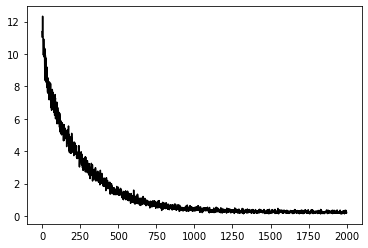

In [22]:
plt.plot(loss_vec, 'k-')

In [23]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)
print(str(slope) + "x + "+str(intercept))# ECUACION LINEAL

0.79666364x + 4.8271184


In [0]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

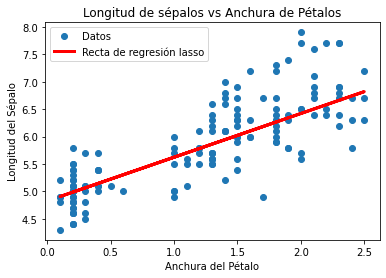

In [25]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label="Recta de regresión lasso", linewidth=3)
plt.legend(loc = "upper left")
plt.title("Longitud de sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

## Ejercicio: Regresión Ridge

$$\sum\frac{(y_r-y_p)^2}{n}+ridge_p\cdot A^2$$

In [0]:
ridge_params = tf.constant(1.0)
ridge_loss = tf.reduce_mean(tf.square(A))
loss = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_target-y_pred)), tf.multiply(ridge_params, ridge_loss)),0)